In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.cm
import numpy as np
import scipy.io
from scipy.stats import multivariate_normal as mvn
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import seaborn as sns

____Part 1: Anomaly detection by gaussian fit____

In [2]:
ex8data1 = scipy.io.loadmat("ex8data1.mat")
ex8data2 = scipy.io.loadmat("ex8data2.mat")
X1 = ex8data1['X']
X1_val = ex8data1['Xval']
y1_val = ex8data1['yval']

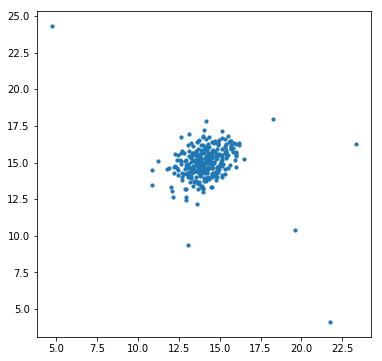

In [3]:
plt.figure(figsize=(6, 6))
plt.scatter(X1.transpose()[0], X1.transpose()[1], s=10)

In [4]:
data1_mean = np.mean(X1, axis=0)
data1_std = np.std(X1, axis=0)
data1_cov = np.diag(data1_std)

Plot the data along with a contour plot of the gaussian fit.

In [5]:
xplt, yplt = np.meshgrid(np.arange(4, 23.5, 0.1), np.arange(4, 25, 0.1))
xy = np.column_stack([xplt.flat, yplt.flat])

zplt = mvn.pdf(xy, data1_mean, data1_cov).reshape(xplt.shape)

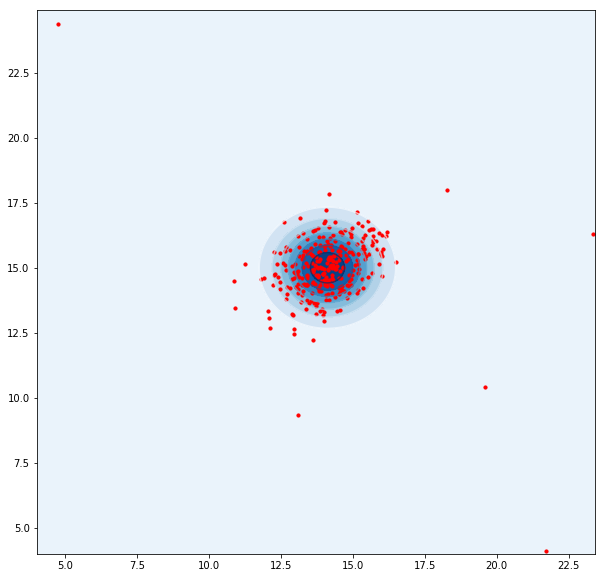

In [6]:
plt.figure(figsize=(10, 10))
plt.contourf(xplt, yplt, zplt, cmap='Blues', alpha = 1)
plt.scatter(X1.transpose()[0], X1.transpose()[1], s=10, color='red')
plt.contour(xplt, yplt, zplt, cmap='Blues', alpha = 0.7)

Use validation data to select probability threshold for anomalies. Thresholds are scored by $F_1$ score of prediction on the validation set. 

In [7]:
def select_threshold(X_val, y_val):
    p = mvn.pdf(X_val, data1_mean, data1_cov)
    epsilon_grid = np.linspace(np.amin(p), np.amax(p), 1000)
    scores = []
    for eps in epsilon_grid:
        y_pred = np.less(p, eps).astype(int)
        scores.append((eps, f1_score(y_val, y_pred)))
    return sorted(scores, key = lambda t: t[1])[-1]

In [8]:
epsilon, f1 = select_threshold(X1_val, y1_val)
print(epsilon)
print(f1)

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0001197380298913486
0.8750000000000001


Predict anomalies based on the validation threshold

In [9]:
def predict(X, threshold):
    return np.less(mvn.pdf(X1, data1_mean, data1_cov), threshold).astype(int)

In [10]:
y_pred = pd.DataFrame(predict(X1, epsilon))

In [11]:
Z = pd.concat([pd.DataFrame(X1), y_pred], axis = 1)
Z.columns.values[2] = 2
Z['pred'] = Z[2]
Z = Z.drop([2], axis=1)

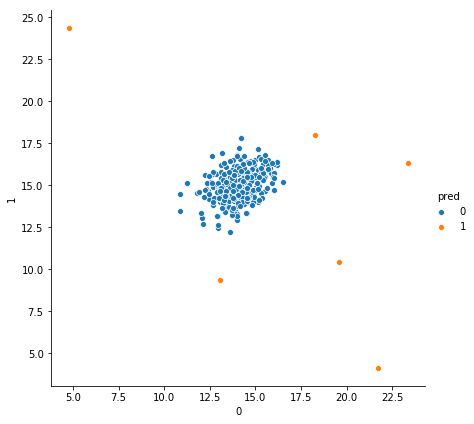

In [12]:
sns.pairplot(x_vars=[0], y_vars=[1], data=Z, hue="pred", height = 6)

____Part 2: Collaborative filtering for recommendations____

In [44]:
ex8_movies = scipy.io.loadmat('ex8_movies.mat')
ex8_movieParams = scipy.io.loadmat('ex8_movieParams.mat')
R_mat = ex8_movies['R']
Y_mat = ex8_movies['Y']
print(R_mat.shape)
print(Y_mat.shape)

(1682, 943)
(1682, 943)


In [45]:
ex8_movies
X = ex8_movieParams['X']
Theta = ex8_movieParams['Theta']
print(X.shape)
print(Theta.shape)
X_Theta = X.dot(Theta.transpose())
print(X_Theta.shape)
tmp = np.zeros((1682,943))

(1682, 10)
(943, 10)
(1682, 943)


In [36]:
indices = np.where(R_mat == 1)
print(indices)

(array([   0,    0,    0, ..., 1679, 1680, 1681]), array([  0,   1,   4, ..., 862, 895, 915]))


In [43]:
np.sum(np.power(Y_mat[indices] - tmp[indices], 2))

1372704.0

In [41]:
100000/(1682*943)

0.06304669364224531